In [1]:
import pandas as pd

df=pd.read_csv('/content/sample_data/fraud.csv', index_col = 0)
y = df['Class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'Class').values

In [5]:
print(df.isnull().sum())

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [6]:
df_clean = df.dropna()
print(f"Original shape: {df.shape}, After removing NaN: {df_clean.shape}")

Original shape: (19429, 30), After removing NaN: (19428, 30)


In [9]:
y = df_clean['Class'].values
X = df_clean.drop(columns='Class').values

In [11]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.40,
                                                    random_state=1)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#--------------------------------------------------
## ------------ SVM Classifier ------------------##
#--------------------------------------------------

from sklearn.svm import SVC

steps = [('scaler', StandardScaler()),
         ('svc', SVC(kernel = 'linear',
                     class_weight='balanced'))]

svcL_pipeline = Pipeline(steps)
svcL_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', kernel='linear'))])

In [14]:
## Polynomial Kernel -----------------------
steps = [('scaler', StandardScaler()),
         ('svc', SVC(kernel = 'poly', degree = 3,
                     class_weight='balanced'))]

svcPoly_pipeline = Pipeline(steps)
svcPoly_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', kernel='poly'))])

In [15]:
## RBF Kernel -----------------------
steps = [('scaler', StandardScaler()),
         ('svc', SVC(kernel = 'rbf', gamma = 'scale',
                     class_weight='balanced'))]

svcRBF_pipeline = Pipeline(steps)
svcRBF_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced'))])

In [17]:
print("Linear Kernel Predictions:", svcL_pipeline.predict(X_test[:5]))
print("Polynomial Kernel Predictions:", svcPoly_pipeline.predict(X_test[:5]))
print("RBF Kernel Predictions:", svcRBF_pipeline.predict(X_test[:5]))

Linear Kernel Predictions: [0. 0. 0. 0. 1.]
Polynomial Kernel Predictions: [1. 0. 1. 0. 0.]
RBF Kernel Predictions: [1. 0. 0. 0. 0.]


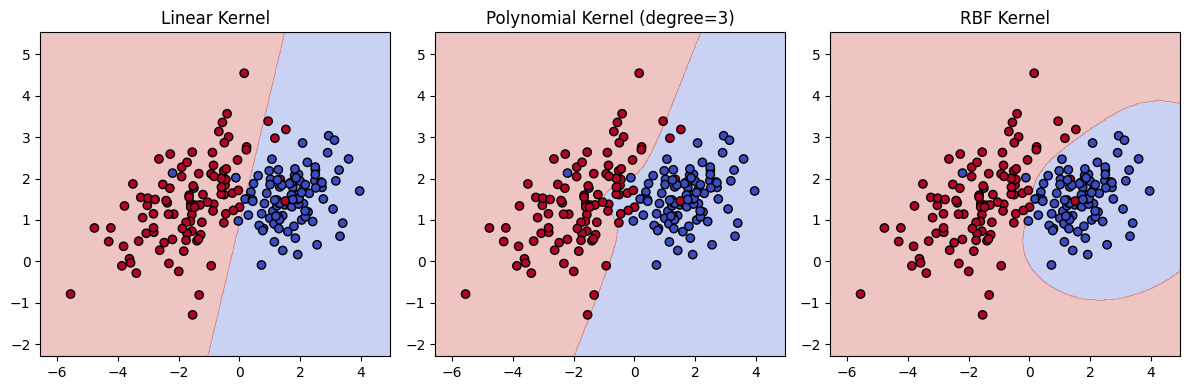

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

def build_svm_pipeline(kernel_type, **kwargs):
    return Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('svc', SVC(kernel=kernel_type, class_weight='balanced', **kwargs))
    ])


X_vis, y_vis = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, flip_y=0.1, class_sep=1.5, random_state=1
)

s
svcL_vis = build_svm_pipeline('linear').fit(X_vis, y_vis)
svcPoly_vis = build_svm_pipeline('poly', degree=3).fit(X_vis, y_vis)
svcRBF_vis = build_svm_pipeline('rbf', gamma='scale').fit(X_vis, y_vis)

def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plot_decision_boundary(svcL_vis, X_vis, y_vis, "Linear Kernel")

plt.subplot(1, 3, 2)
plot_decision_boundary(svcPoly_vis, X_vis, y_vis, "Polynomial Kernel (degree=3)")

plt.subplot(1, 3, 3)
plot_decision_boundary(svcRBF_vis, X_vis, y_vis, "RBF Kernel")

plt.tight_layout()
plt.show()
